In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error

<br>
<br>

#### 1-1. (미국 보스턴의 주택 가격) 데이터 읽어들이기 & Binary label 만들어주기

In [50]:
df_data = pd.read_excel('boston_house_data.xlsx', index_col=0)
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [51]:
df_target = pd.read_excel('boston_house_target.xlsx', index_col=0)
df_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
# 집값의 평균값이 얼마일까요?
mean_price = df_target[0].mean()
mean_price

22.532806324110698

In [53]:
def check_price(x):
    if x > mean_price:
        return 1
    else:
        return 0

In [54]:
df_target['Label'] = df_target[0].apply(lambda x: 1 if x > mean_price else 0) # 새로운 함수를 '적용'해주려면?
df_target.head()

,0,Label
0,24.0,1
1,21.6,0
2,34.7,1
3,33.4,1
4,36.2,1


<br>
<br>

#### 1-2. Dataframe 을 Numpy array (배열, 행렬)로 바꿔주기

In [57]:
boston_data = np.array(df_data)
boston_target = np.array(df_target['Label'])

array([[  6.575 ,  65.2   ,   4.09  , ..., 296.    ,  15.3   , 396.9   ],
       [  6.421 ,  78.9   ,   4.9671, ..., 242.    ,  17.8   , 396.9   ],
       [  7.185 ,  61.1   ,   4.9671, ..., 242.    ,  17.8   , 392.83  ],
       ...,
       [  6.976 ,  91.    ,   2.1675, ..., 273.    ,  21.    , 396.9   ],
       [  6.794 ,  89.3   ,   2.3889, ..., 273.    ,  21.    , 393.45  ],
       [  6.03  ,  80.8   ,   2.505 , ..., 273.    ,  21.    , 396.9   ]])

In [10]:
boston_target

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,

<br>
<br>

#### 2. Feature 선택하기

- 0 : **범죄율**
- 1 : **25,000 평방피트를 초과하는 거주지역 비율**
- 2 : **비소매상업지역 면적 비율** 
- 3 : **찰스강의 경계에 위치한 경우는 1, 아니면 0**
- 4 : **일산화질소 농도**
- 5 : **주택당 방 수 (거실 외 subroom)**
- 6 : **1940년 이전에 건축된 주택의 비율**
- 7 : **직업센터의 거리**
- 8 : **방사형 고속도로까지의 거리**
- 9 : **재산세율**
- 10 : **학생/교사 비율**
- 11 : **인구 중 흑인 비율**
- 12 : **인구 중 하위 계층 비율**

In [58]:
# Use only one feature 
# 5번열과 12번열만 꺼낸다.
# boston_X = boston_data[:,[5, 12]]
# boston_X = boston_data[:,(5, 12)] # 주택당 방 수 & 인구 중 하위 계층 비율 
boston_X = boston_data[:, 5:12]

In [59]:
boston_Y = boston_target

<br>
<br>

#### 3. Training & Test set 으로 나눠주기

In [60]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 7)
(152, 7)
(354,)
(152,)


<br>
<br>

#### 4. 비어있는 모델 객체 만들기

In [62]:
model = linear_model.LogisticRegression() # 로지스틱회귀

<br>
<br>

#### 5. 모델 객체 학습시키기 (on training data)

In [63]:
# Train the model using the training sets
model.fit(x_train, y_train)

LogisticRegression()

<br>
<br>

#### 6. 학습이 끝난 모델 테스트하기 (on test data)

In [64]:
# 양성/음성 확률을 확인하려면?
# plot roc curve for test set
pred_test = model.predict(x_test) # Predict 'probability'
pred_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [65]:
x_test[:10, :]

array([[  6.333 ,  17.2   ,   5.2146,   4.    , 430.    ,  16.9   ,
        375.21  ],
       [  6.216 , 100.    ,   1.1691,  24.    , 666.    ,  20.2   ,
        366.15  ],
       [  6.373 ,  92.4   ,   3.3633,   5.    , 276.    ,  16.4   ,
        393.74  ],
       [  5.349 ,  96.    ,   1.7028,  24.    , 666.    ,  20.2   ,
        396.9   ],
       [  6.232 ,  53.7   ,   5.0141,   5.    , 398.    ,  18.7   ,
        386.4   ],
       [  5.834 ,  56.5   ,   4.4986,   4.    , 307.    ,  21.    ,
        395.62  ],
       [  5.905 ,  53.2   ,   3.1523,  24.    , 666.    ,  20.2   ,
        388.22  ],
       [  5.968 ,  58.5   ,   4.8122,   5.    , 224.    ,  20.2   ,
        396.9   ],
       [  4.973 ,  37.8   ,   2.5194,   4.    , 304.    ,  18.4   ,
        350.45  ],
       [  6.405 ,  85.4   ,   2.7147,   5.    , 384.    ,  20.9   ,
         70.8   ]])

In [66]:
from sklearn.metrics import accuracy_score, top_k_accuracy_score # accuracy
# top_k_accuracy_score : 1000개의 예측결과 중 상위 5개를 뽑음 많은 클래스들 중 하나를 맞춘다.
# 모델 분류의 정확도
print('Accuracy: ', accuracy_score(model.predict(x_test), y_test))

Accuracy:  0.8486842105263158


In [67]:
# 0인지 1인지 내놓기 전 => 첫번째열 클래스0일 확률값 + 두번째열 클래스1일 확률값 = 1
pred_test = model.predict_proba(x_test)
pred_test[:10]

array([[0.20717032, 0.79282968],
       [0.91599636, 0.08400364],
       [0.42173863, 0.57826137],
       [0.98345837, 0.01654163],
       [0.72859711, 0.27140289],
       [0.91645002, 0.08354998],
       [0.8135784 , 0.1864216 ],
       [0.74962924, 0.25037076],
       [0.82801068, 0.17198932],
       [0.98248731, 0.01751269]])

<br>
<br>

#### 7. 모델 시각화

In [68]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# x좌표, y좌표, threshold
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
roc_auc

0.8883538434100232

In [69]:
roc_auc_score(y_test, pred_test[:,1])

0.8883538434100232

In [70]:
# 계단의 모서리 roccourve를 만들기 위한 x좌표
fpr
# 계단의 모서리 roccourve를 만들기 위한 y좌표
tpr

array([0.        , 0.01587302, 0.3968254 , 0.3968254 , 0.52380952,
       0.52380952, 0.63492063, 0.63492063, 0.68253968, 0.68253968,
       0.73015873, 0.73015873, 0.76190476, 0.76190476, 0.77777778,
       0.77777778, 0.79365079, 0.79365079, 0.85714286, 0.85714286,
       0.88888889, 0.88888889, 0.9047619 , 0.9047619 , 0.92063492,
       0.92063492, 0.93650794, 0.93650794, 0.95238095, 0.95238095,
       0.96825397, 0.96825397, 0.98412698, 0.98412698, 1.        ])

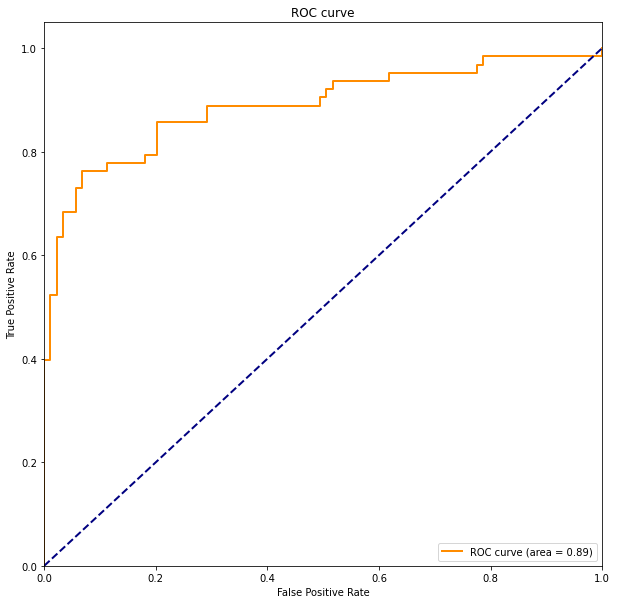

In [71]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right") #location
plt.title("ROC curve")

plt.show()

<br>
<br>

#### Practice. 더 좋은 성능을 보이는 Feature 를 찾아보세요!

Accuracy:  0.8486842105263158


C:\Users\TECH2_07\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


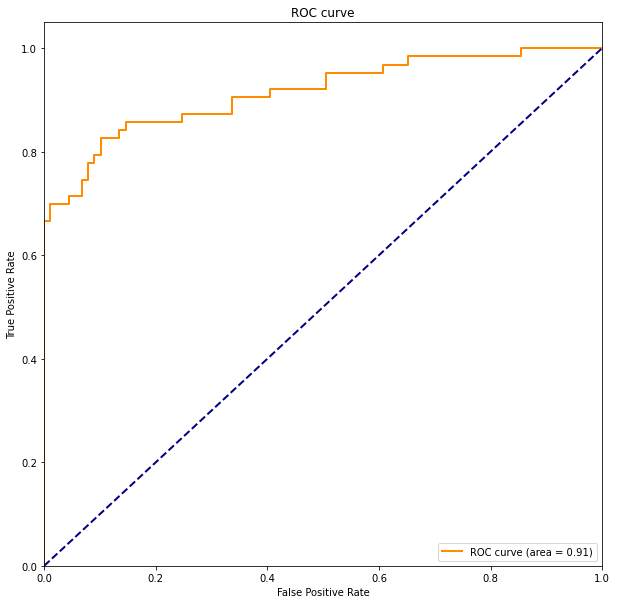

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, auc

# 1. Prepare the data (array!)
df_data = pd.read_excel('boston_house_data.xlsx', index_col=0)
df_target = pd.read_excel('boston_house_target.xlsx')
df_target['Label'] = df_target[0].apply(lambda x: 1 if x > df_target[0].mean() else 0 ) 
boston_data = np.array(df_data)
boston_target = np.array(df_target['Label'])

# 2. Feature selection
boston_X = boston_data[:, 5:13] # 주택당 방 수 & 인구 중 하위 계층 비율 
boston_Y = boston_target

# 3. Train/Test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

# 4. Create model object 
model = linear_model.LogisticRegression()

# 5. Train the model 
model.fit(x_train, y_train)

# 6. Test the model
print('Accuracy: ', accuracy_score(model.predict(x_test), y_test))

# 7. Visualize the model
pred_test = model.predict_proba(x_test) # Predict 'probability'
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

In [ ]:
# 513 